In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt

In [2]:
data = pd.read_csv('Mortality_Rate_Data.csv')

### plotting for texas

### Pre post analysis for Florida 

In [3]:
data_fl = data[data["State"] == 'Florida']

##### policy change in 2010

### Aggregate at state level - single point for each year

In [4]:
data_fl['Agg'] = data_fl.groupby(['State','Year'])['Mortality_Rate'].transform('mean')


/tmp/ipykernel_17900/2982374715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fl['Agg'] = data_fl.groupby(['State','Year'])['Mortality_Rate'].transform('mean')


In [5]:
data_fl = data_fl[['State','Year','Agg']].drop_duplicates() 

In [6]:
fl_pre = data_fl[data_fl['Year'] < 2010]

In [7]:
fl_post = data_fl[(data_fl['Year'] >= 2010) & (data_fl['Year'] < 2014)]

/tmp/ipykernel_17900/4119644764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_pre['Policy Change'] = 'Pre'
/tmp/ipykernel_17900/4119644764.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_post['Policy Change'] = 'Post'


Text(66.24972222222222, 0.5, 'Mortality Rate')

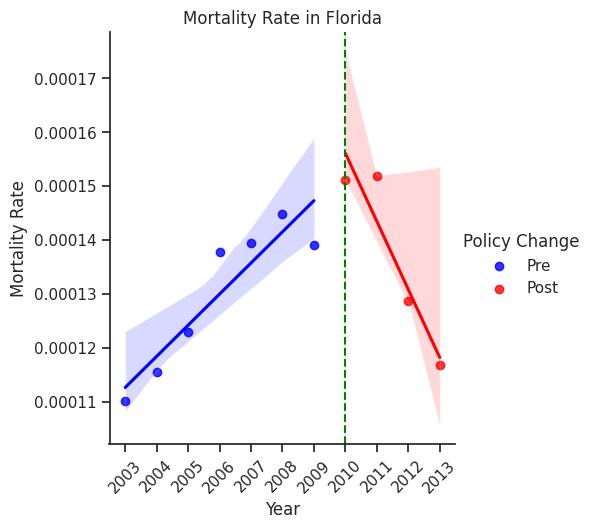

In [8]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
fl_pre['Policy Change'] = 'Pre'
fl_post['Policy Change'] = 'Post'
combined_data = pd.concat([fl_pre, fl_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="Year", y="Agg", data=combined_data, hue='Policy Change', palette={"Pre": "blue", "Post": "red"}).set(title='Mortality Rate in Florida')

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2010, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['Year'].min()), int(combined_data['Year'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Mortality Rate")


# Show the plot



##### creating for washington

In [9]:
data_wa = data[data["State"] == 'Washington']
data_wa['Agg'] = data_wa.groupby(['State','Year'])['Mortality_Rate'].transform('mean')
data_wa = data_wa[['State','Year','Agg']].drop_duplicates() 
wa_pre = data_wa[(data_wa['Year'] > 2005) & (data_wa['Year'] < 2012)]
wa_post = data_wa[data_wa['Year'] >= 2012]

/tmp/ipykernel_17900/2263320599.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wa['Agg'] = data_wa.groupby(['State','Year'])['Mortality_Rate'].transform('mean')


/tmp/ipykernel_17900/994253618.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_pre['Policy Change'] = 'Pre'
/tmp/ipykernel_17900/994253618.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_post['Policy Change'] = 'Post'


Text(66.24972222222222, 0.5, 'Mortality Rate')

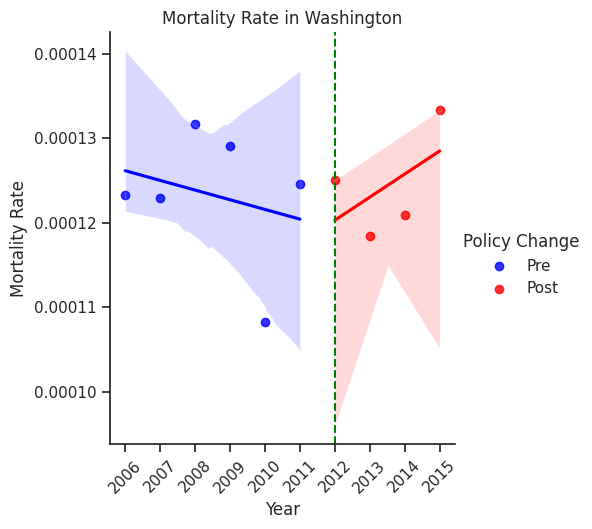

In [10]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
wa_pre['Policy Change'] = 'Pre'
wa_post['Policy Change'] = 'Post'
combined_data = pd.concat([wa_pre, wa_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="Year", y="Agg", data=combined_data, hue='Policy Change', palette={"Pre": "blue", "Post": "red"}).set(title = 'Mortality Rate in Washington')

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2012, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['Year'].min()), int(combined_data['Year'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Mortality Rate")



### texas mortality rate

In [11]:
data_tx = data[data["State"] == 'Texas']
data_tx['Agg'] = data_tx.groupby(['State','Year'])['Mortality_Rate'].transform('mean')
data_tx = data_tx[['State','Year','Agg']].drop_duplicates() 
tx_pre = data_tx[data_tx['Year'] < 2007]
tx_post = data_tx[(data_tx['Year'] >= 2007) & (data_tx['Year'] <= 2010)]

/tmp/ipykernel_17900/1650048328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tx['Agg'] = data_tx.groupby(['State','Year'])['Mortality_Rate'].transform('mean')


/tmp/ipykernel_17900/2583106507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_pre['Policy Change'] = 'Pre'
/tmp/ipykernel_17900/2583106507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tx_post['Policy Change'] = 'Post'


Text(66.24972222222222, 0.5, 'Mortality Rate')

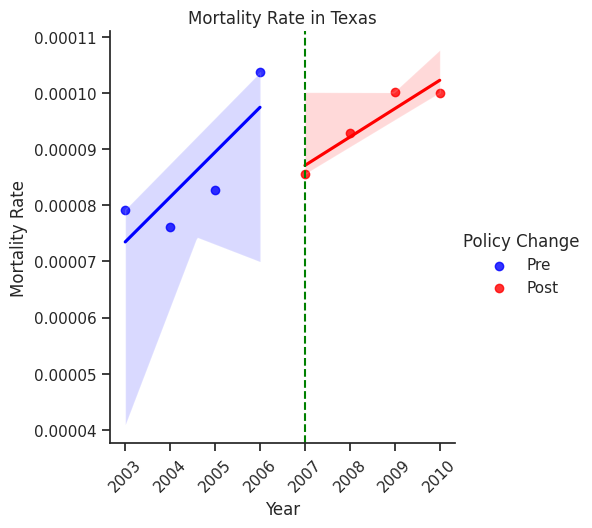

In [12]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
tx_pre['Policy Change'] = 'Pre'
tx_post['Policy Change'] = 'Post'
combined_data = pd.concat([tx_pre, tx_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="Year", y="Agg", data=combined_data, hue='Policy Change', palette={"Pre": "blue", "Post": "red"}).set(title = 'Mortality Rate in Texas')

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2007, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['Year'].min()), int(combined_data['Year'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Mortality Rate")


## Opioid per capita

In [13]:
opioid_data = pd.read_csv('county_mme_per_cap.csv')

In [14]:
opioid_data.head(10)

,Unnamed: 0,BUYER_COUNTY,BUYER_STATE,YEAR,MME,MME_Conversion_Factor,CALC_BASE_WT_IN_GM,STATE_ID,COUNTY_NAME,Population,MME_PER_CAP
0,0,ABBEVILLE,SC,2006,3.136215e+06,1023.0,2506.084390,SC,ABBEVILLE,25821.0,121.459873
1,1,ABBEVILLE,SC,2007,3.232603e+06,1088.0,2623.718375,SC,ABBEVILLE,25745.0,125.562362
2,2,ABBEVILLE,SC,2008,3.070698e+06,1000.5,2574.677256,SC,ABBEVILLE,25699.0,119.487044
3,3,ABBEVILLE,SC,2009,3.827607e+06,1075.0,3110.779538,SC,ABBEVILLE,25614.0,149.434179
4,4,ABBEVILLE,SC,2010,4.612935e+06,1374.5,3695.582848,SC,ABBEVILLE,25338.0,182.056003
5,5,ABBEVILLE,SC,2011,4.833266e+06,1568.5,3890.932455,SC,ABBEVILLE,25093.0,192.614116
6,6,ABBEVILLE,SC,2012,4.835180e+06,1759.0,3961.652980,SC,ABBEVILLE,25033.0,193.152246
7,7,ABBEVILLE,SC,2013,4.846713e+06,1846.5,3988.785070,SC,ABBEVILLE,24912.0,194.553354
8,8,ABBEVILLE,SC,2014,5.095216e+06,1839.5,4202.032980,SC,ABBEVILLE,24811.0,205.361168
9,9,ABBEVILLE,SC,2015,5.343645e+06,1962.5,4372.959850,SC,ABBEVILLE,24814.0,215.347998


## Filter for Fl and groupby at year level

In [15]:
opioid_data_fl = opioid_data[opioid_data["BUYER_STATE"] == 'FL']
opioid_data_fl['Agg'] = opioid_data_fl.groupby(['BUYER_STATE','YEAR'])['MME_PER_CAP'].transform('mean')
opioid_data_fl = opioid_data_fl[['BUYER_STATE','YEAR','Agg']].drop_duplicates() 
fl_pre = opioid_data_fl[opioid_data_fl['YEAR'] < 2010]
fl_post = opioid_data_fl[(opioid_data_fl['YEAR'] >= 2010) & (opioid_data_fl['YEAR'] <=2013)]

/tmp/ipykernel_17900/3912222403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opioid_data_fl['Agg'] = opioid_data_fl.groupby(['BUYER_STATE','YEAR'])['MME_PER_CAP'].transform('mean')


/tmp/ipykernel_17900/1620014539.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_pre['Policy Change'] = 'Pre'
/tmp/ipykernel_17900/1620014539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fl_post['Policy Change'] = 'Post'


Text(57.56097222222223, 0.5, 'Opioids per Cap')

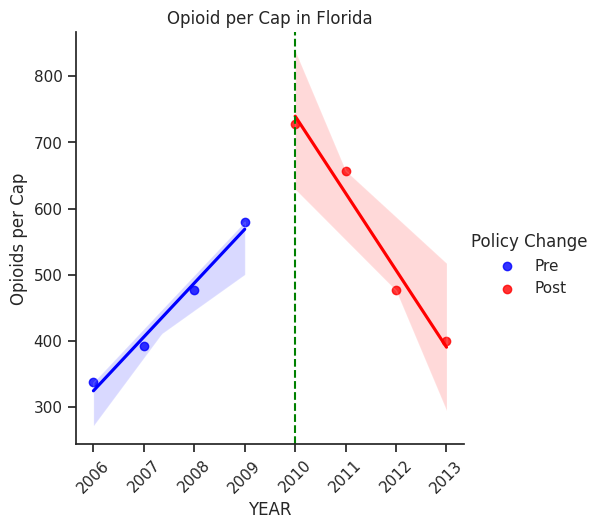

In [16]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
fl_pre['Policy Change'] = 'Pre'
fl_post['Policy Change'] = 'Post'
combined_data = pd.concat([fl_pre, fl_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="YEAR", y="Agg", data=combined_data, hue='Policy Change', palette={"Pre": "blue", "Post": "red"}).set(title = 'Opioid per Cap in Florida')

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2010, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['YEAR'].min()), int(combined_data['YEAR'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Opioids per Cap")



### opioids for washington

In [17]:
opioid_data_wa = opioid_data[opioid_data["BUYER_STATE"] == 'WA']
opioid_data_wa['Agg'] = opioid_data_wa.groupby(['BUYER_STATE','YEAR'])['MME_PER_CAP'].transform('mean')
opioid_data_wa = opioid_data_wa[['BUYER_STATE','YEAR','Agg']].drop_duplicates() 
wa_pre = opioid_data_wa[(opioid_data_wa['YEAR'] > 2006) & (opioid_data_wa['YEAR'] < 2012)]
wa_post = opioid_data_wa[(opioid_data_wa['YEAR'] >= 2012) & (opioid_data_wa['YEAR'] <=2015)]

/tmp/ipykernel_17900/214511982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opioid_data_wa['Agg'] = opioid_data_wa.groupby(['BUYER_STATE','YEAR'])['MME_PER_CAP'].transform('mean')


/tmp/ipykernel_17900/4285302480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_pre['Policy Change'] = 'Pre'
/tmp/ipykernel_17900/4285302480.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wa_post['Policy Change'] = 'Post'


Text(57.59315277777779, 0.5, 'Opioids per Cap')

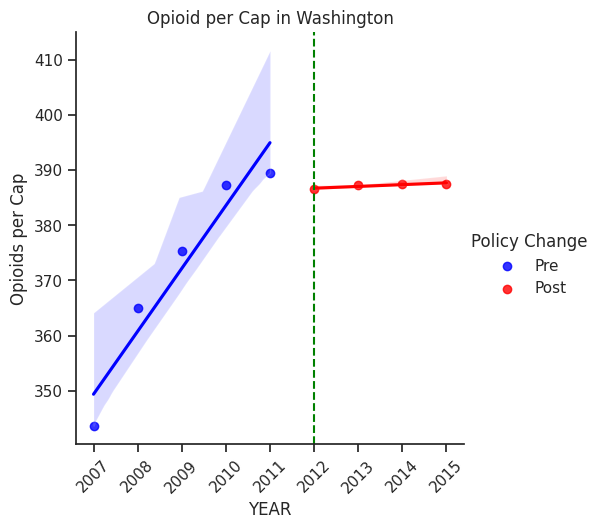

In [18]:
import seaborn as sns

# Assuming you have already defined fl_pre and fl_post DataFrames

# Merge the datasets for easier plotting
wa_pre['Policy Change'] = 'Pre'
wa_post['Policy Change'] = 'Post'
combined_data = pd.concat([wa_pre, wa_post])

# Plotting using Seaborn
sns.set(style="ticks")  # Setting the style to remove the gridlines

# Create the plot
plot = sns.lmplot(x="YEAR", y="Agg", data=combined_data, hue='Policy Change', palette={"Pre": "blue", "Post": "red"}).set(title = 'Opioid per Cap in Washington')

# Accessing the underlying axes
ax = plot.axes[0, 0]

# Adding a vertical line at 2010
ax.axvline(x=2012, color='green', linestyle='--')

# Set x-axis ticks to display every year
ax.set_xticks(range(int(combined_data['YEAR'].min()), int(combined_data['YEAR'].max()) + 1))

# Rotate x-axis labels for better readability and increase space between them
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Opioids per Cap")


##### opioid for texas

In [19]:
opioid_data_tx = opioid_data[opioid_data["BUYER_STATE"] == 'TX']
opioid_data_tx['Agg'] = opioid_data_tx.groupby(['BUYER_STATE','YEAR'])['MME_PER_CAP'].transform('mean')
opioid_data_tx = opioid_data_tx[['BUYER_STATE','YEAR','Agg']].drop_duplicates() 

/tmp/ipykernel_17900/1480664967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opioid_data_tx['Agg'] = opioid_data_tx.groupby(['BUYER_STATE','YEAR'])['MME_PER_CAP'].transform('mean')
